In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\internship\drug_dataset.csv')
df.head(300000)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,25-34,Other,12/13/2008,"ketoprofen capsule, extended release pellets 2...",5995,4,4,one of the few medicines i have found that hel...,4,Female,"Upset stomach , constipation , diarrhea , d...",10
299996,35-44,Pain,10/16/2008,"ketoprofen capsule, extended release pellets 2...",5995,2,2,arthritus in lower back still have headaches h...,1,Female,"Upset stomach , constipation , diarrhea , d...",0
299997,65-74,Type 2 Diabetes Mellitus,2/10/2008,januvia,145704,4,2,"So far, my average reading is around 200. I ne...",2,Female,,5
299998,45-54,Other,5/8/2008,"ketoprofen capsule, extended release pellets 2...",5995,3,4,My Name Steven M Banks Disabled Veteran I have...,4,Male,"Upset stomach , constipation , diarrhea , d...",15


In [3]:
df[['Age','Drug','Condition','Sex','Sides']].head(300000)

,Age,Drug,Condition,Sex,Sides
0,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...
299995,25-34,"ketoprofen capsule, extended release pellets 2...",Other,Female,"Upset stomach , constipation , diarrhea , d..."
299996,35-44,"ketoprofen capsule, extended release pellets 2...",Pain,Female,"Upset stomach , constipation , diarrhea , d..."
299997,65-74,januvia,Type 2 Diabetes Mellitus,Female,
299998,45-54,"ketoprofen capsule, extended release pellets 2...",Other,Male,"Upset stomach , constipation , diarrhea , d..."


In [4]:
dataset =df[['Age','Drug','Condition','Sex','Sides']].head()

In [5]:
dataset.head(300000)

,Age,Drug,Condition,Sex,Sides
0,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,35-44,warfarin (bulk) 100 % powder,Other,Male,


### NAME AND RACE COLUMN ADDITION


In [6]:
from mimesis import Person
person = Person('en')

In [7]:
# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name
names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head(300000)

,Name
0,Damian
1,Scottie
2,Julee
3,Trinidad
4,Lilli
...,...
299995,Johnie
299996,Nadene
299997,Jarrod
299998,Vannesa


In [8]:
type(data_name)

pandas.core.frame.DataFrame

In [9]:
dataset=pd.concat([data_name,dataset],axis=1)

In [10]:
dataset

,Name,Age,Drug,Condition,Sex,Sides
0,Damian,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,Scottie,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,Julee,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,Trinidad,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,Lilli,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...,...
362801,Sam,NaN,NaN,NaN,NaN,NaN
362802,Antwan,NaN,NaN,NaN,NaN,NaN
362803,Lucas,NaN,NaN,NaN,NaN,NaN
362804,Tyron,NaN,NaN,NaN,NaN,NaN


In [11]:
import random

In [12]:
options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head(362807)

,Race
0,Hispanic
1,Hispanic
2,White
3,White
4,White
...,...
362801,White
362802,White
362803,Asian
362804,Hispanic


In [13]:
dataset = pd.concat([data_race, dataset], axis=1)
dataset.head(300000)

,Race,Name,Age,Drug,Condition,Sex,Sides
0,Hispanic,Damian,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,Hispanic,Scottie,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,White,Julee,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,White,Trinidad,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,White,Lilli,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...,...,...
299995,White,Johnie,NaN,NaN,NaN,NaN,NaN
299996,White,Nadene,NaN,NaN,NaN,NaN,NaN
299997,White,Jarrod,NaN,NaN,NaN,NaN,NaN
299998,Hispanic,Vannesa,NaN,NaN,NaN,NaN,NaN


### DATASET is ready for EDA AND Preprocessing

### list of drugs

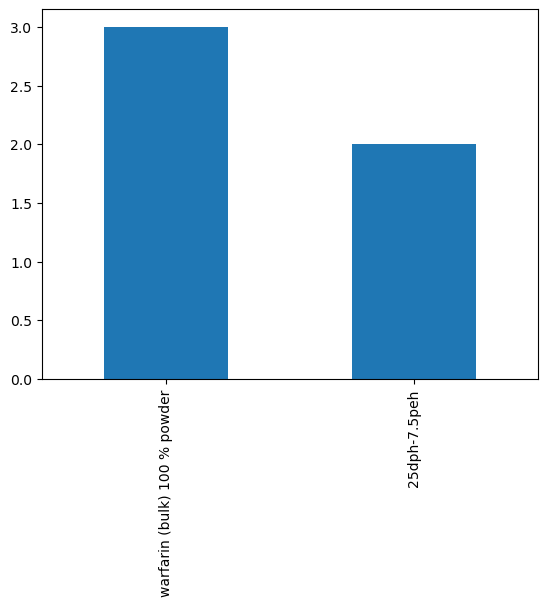

In [14]:
dataset['Drug'].value_counts().head(15).plot(kind='bar')
#plt.webmd.new['figure.figsize']=(10,7)
plt.show()